# Handin exercise for week 5: Pandas

### Ex1 Use data from Danmarks Statistik - Databanken

5(A) What is the change in pct of divorced danes from 2008 to 2020?

In [28]:
import pandas 
import numpy
import matplotlib.pyplot as plot

url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F&Tid=2008K4%2C2020K1'
pandas_CSV = pandas.read_csv(url, delimiter=';')
pandas_CSV['TID'] = pandas_CSV['TID'].map(lambda x: int(x[:-2]))

print('The change of divorced danes from 2008 to 2020 in pct : {}'
      .format(((pandas_CSV['INDHOLD']-pandas_CSV['INDHOLD'][0])/pandas_CSV['INDHOLD'][0])[1] * 100))


The change of divorced danes from 2008 to 2020 in pct : 26.016531067484888



5(B) Which of the 5 biggest cities has the highest percentage of 'Never Married'?

In [29]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=U%2CTOT&Tid=2020K1&OMR%C3%85DE=101%2C147%2C155%2C185%2C165%2C151%2C153%2C157%2C159%2C161%2C163%2C167%2C169%2C183%2C173%2C175%2C187%2C201%2C240%2C210%2C250%2C270%2C260%2C217%2C219%2C223%2C230%2C400%2C411%2C253%2C259%2C350%2C265%2C269%2C320%2C376%2C316%2C326%2C360%2C370%2C306%2C329%2C330%2C340%2C336%2C390%2C420%2C430%2C440%2C482%2C410%2C480%2C450%2C461%2C479%2C492%2C530%2C561%2C563%2C607%2C510%2C621%2C540%2C550%2C573%2C575%2C630%2C580%2C710%2C766%2C615%2C707%2C727%2C730%2C741%2C740%2C746%2C706%2C751%2C657%2C661%2C756%2C665%2C760%2C779%2C671%2C791%2C810%2C813%2C860%2C849%2C825%2C846%2C773%2C840%2C787%2C820%2C851'
pandas_CSV = pandas.read_csv(url, delimiter=';')
pandas_CSV['TID'] = pandas_CSV['TID'].map(lambda x: int(x[:-2]))
pandas_CSV = pandas_CSV.sort_values(by=['CIVILSTAND', 'INDHOLD'], ascending=False)
data = numpy.array(pandas_CSV)

biggest_cities = data[(data[:,0] == 'I alt')][0:5]
not_married = numpy.array(list(filter(lambda x: x[2] in biggest_cities[:,2], data[(data[:,0] == 'Ugift')])))
not_married_in_pct = {x[2]: (x[3]/biggest_cities[index][3]) * 100 for index,x in enumerate(not_married)}
not_married_in_pct = {k: v for k, v in sorted(not_married_in_pct.items(), key=lambda item: item[1], reverse=True)}

print('Out of the 5 biggest cities the city with the highest percentage of "Never Married" is: {} with {}%'
      .format(list(not_married_in_pct.keys())[0], list(not_married_in_pct.values())[0]))

Out of the 5 biggest cities the city with the highest percentage of "Never Married" is: København with 65.23579087199924%


5(C) Show a bar chart of changes in marital status in Copenhagen from 2008 till now!

Text(0, 0.5, 'Amount of people')

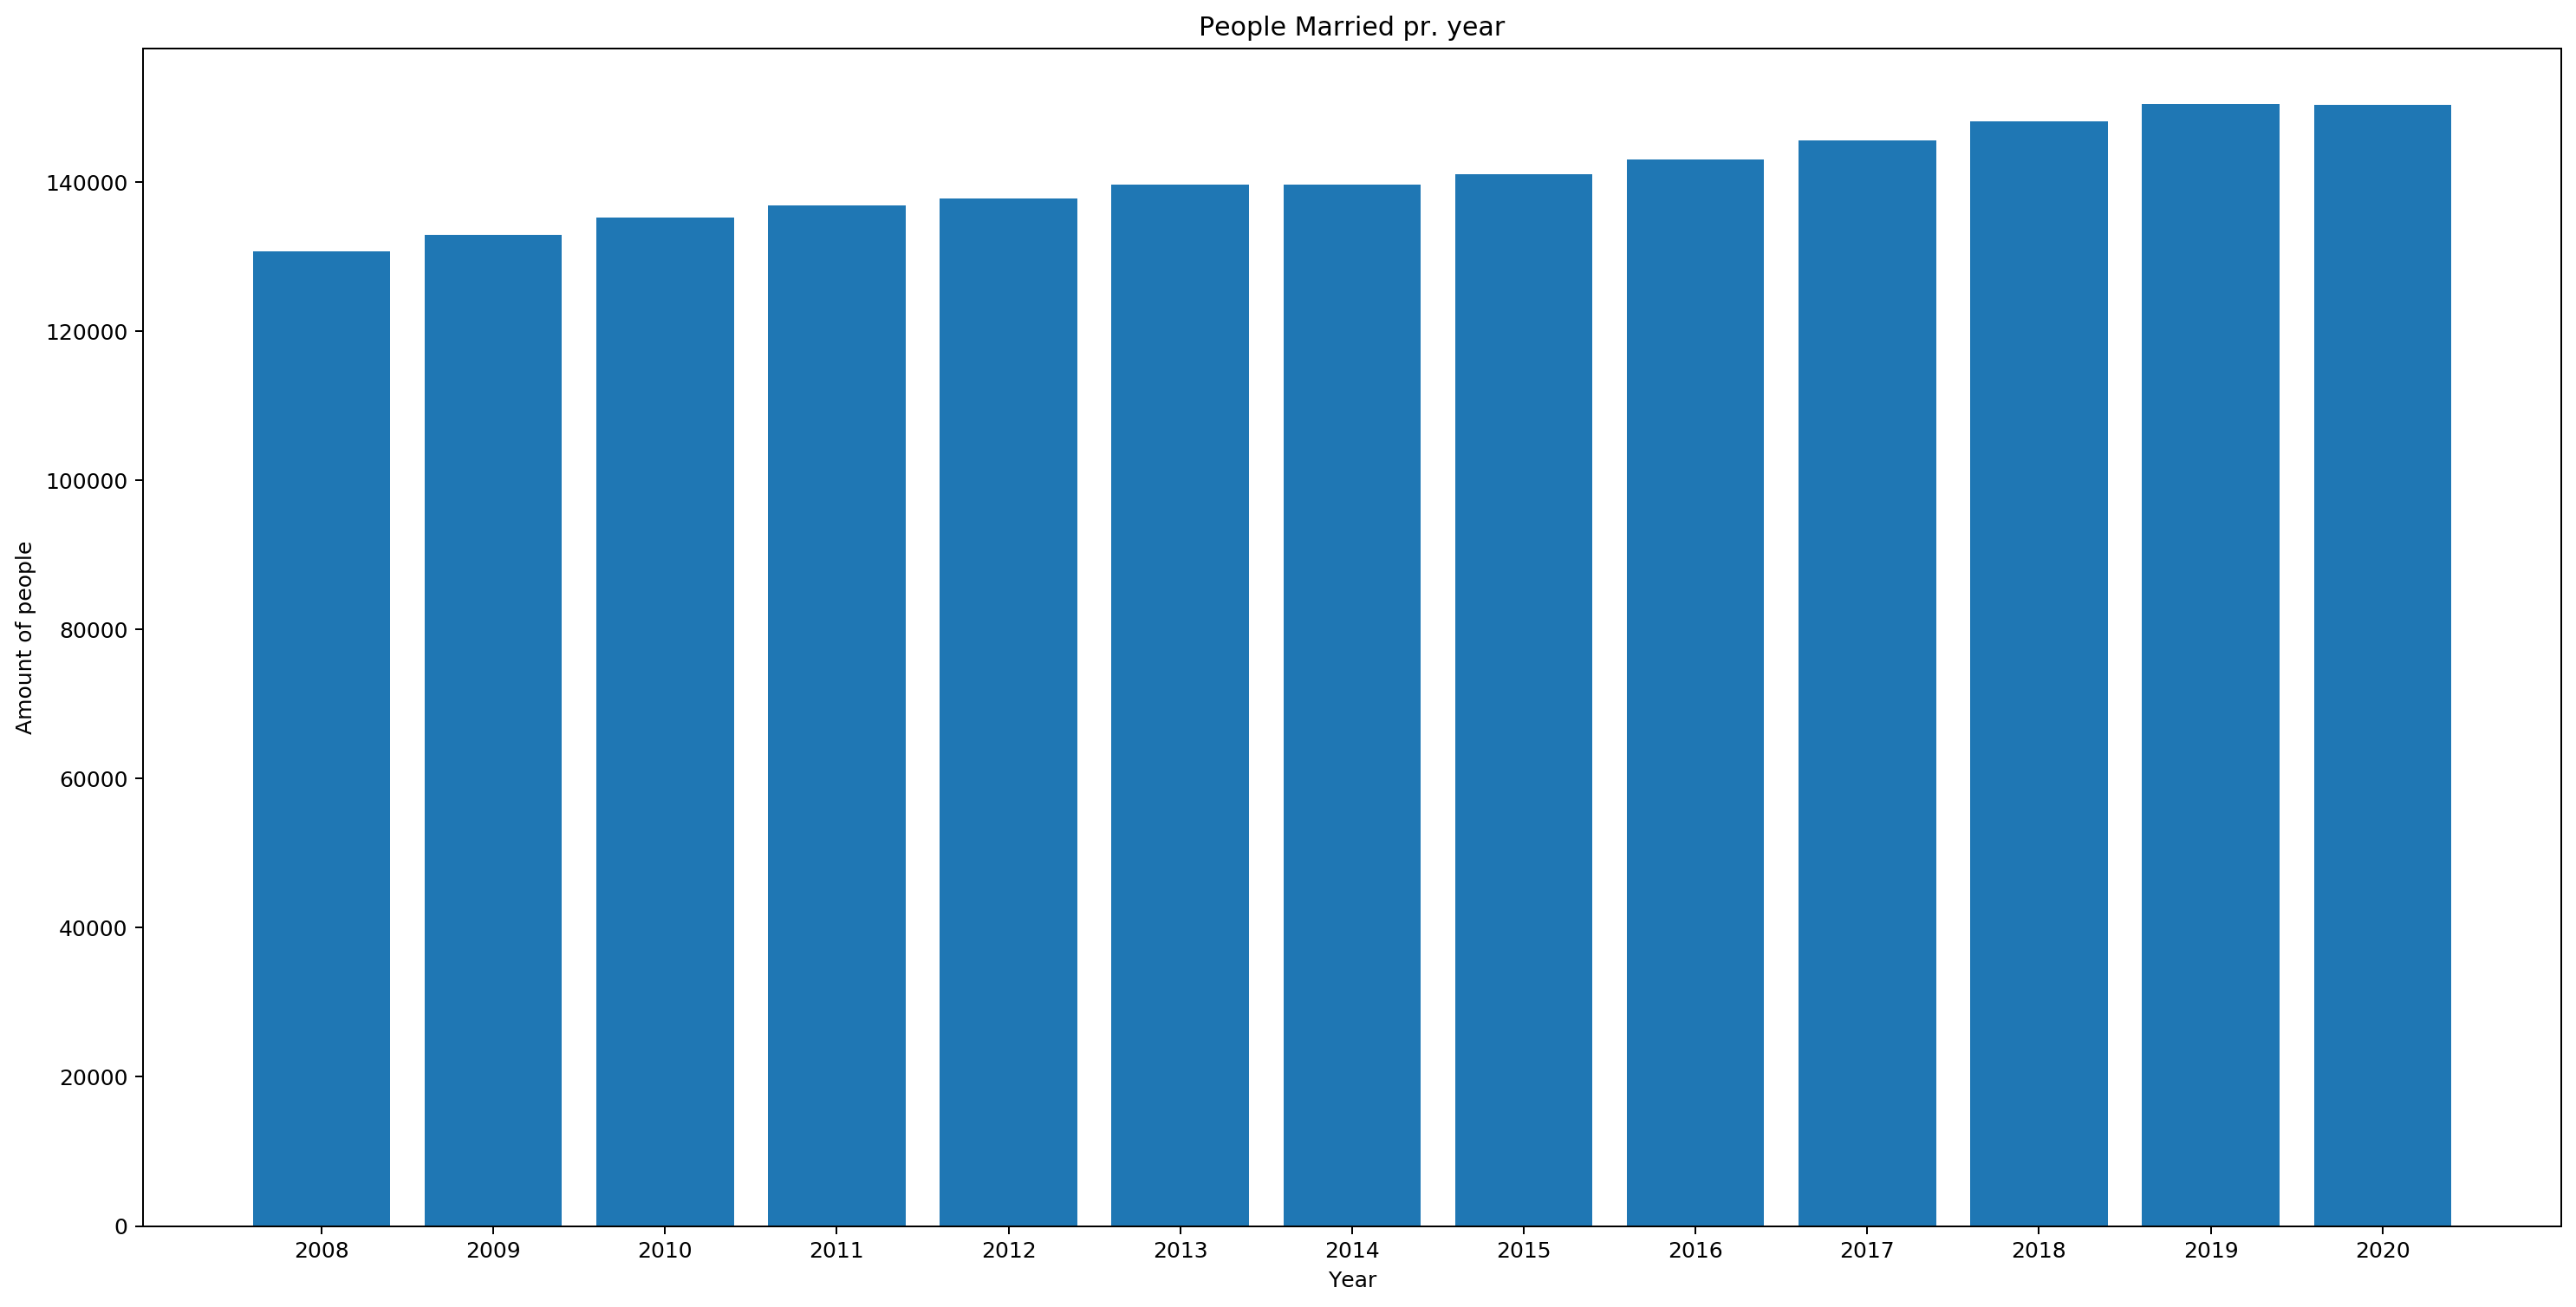

In [30]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=101&Tid=*&CIVILSTAND=G'
pandas_CSV = pandas.read_csv(url, delimiter=';')
pandas_CSV['TID'] = pandas_CSV['TID'].map(lambda x: int(x[:-2]))
data = numpy.array(pandas_CSV)

cities = {}
for city in data:
    cities[city[1]] = city[3]

#Chart

plot.figure(num=None, figsize=(20, 10), dpi=180, facecolor='w', edgecolor='k')
y_bar = cities.values()
x_bar = cities.keys()
plot.bar(x_bar, y_bar)
plot.xticks(list(x_bar))
plot.title('People Married pr. year')
plot.xlabel('Year')
plot.ylabel('Amount of people')


Show a bar chart of 'Married' and 'Never Married' for all ages in DK (Hint: 2 bars of different color)

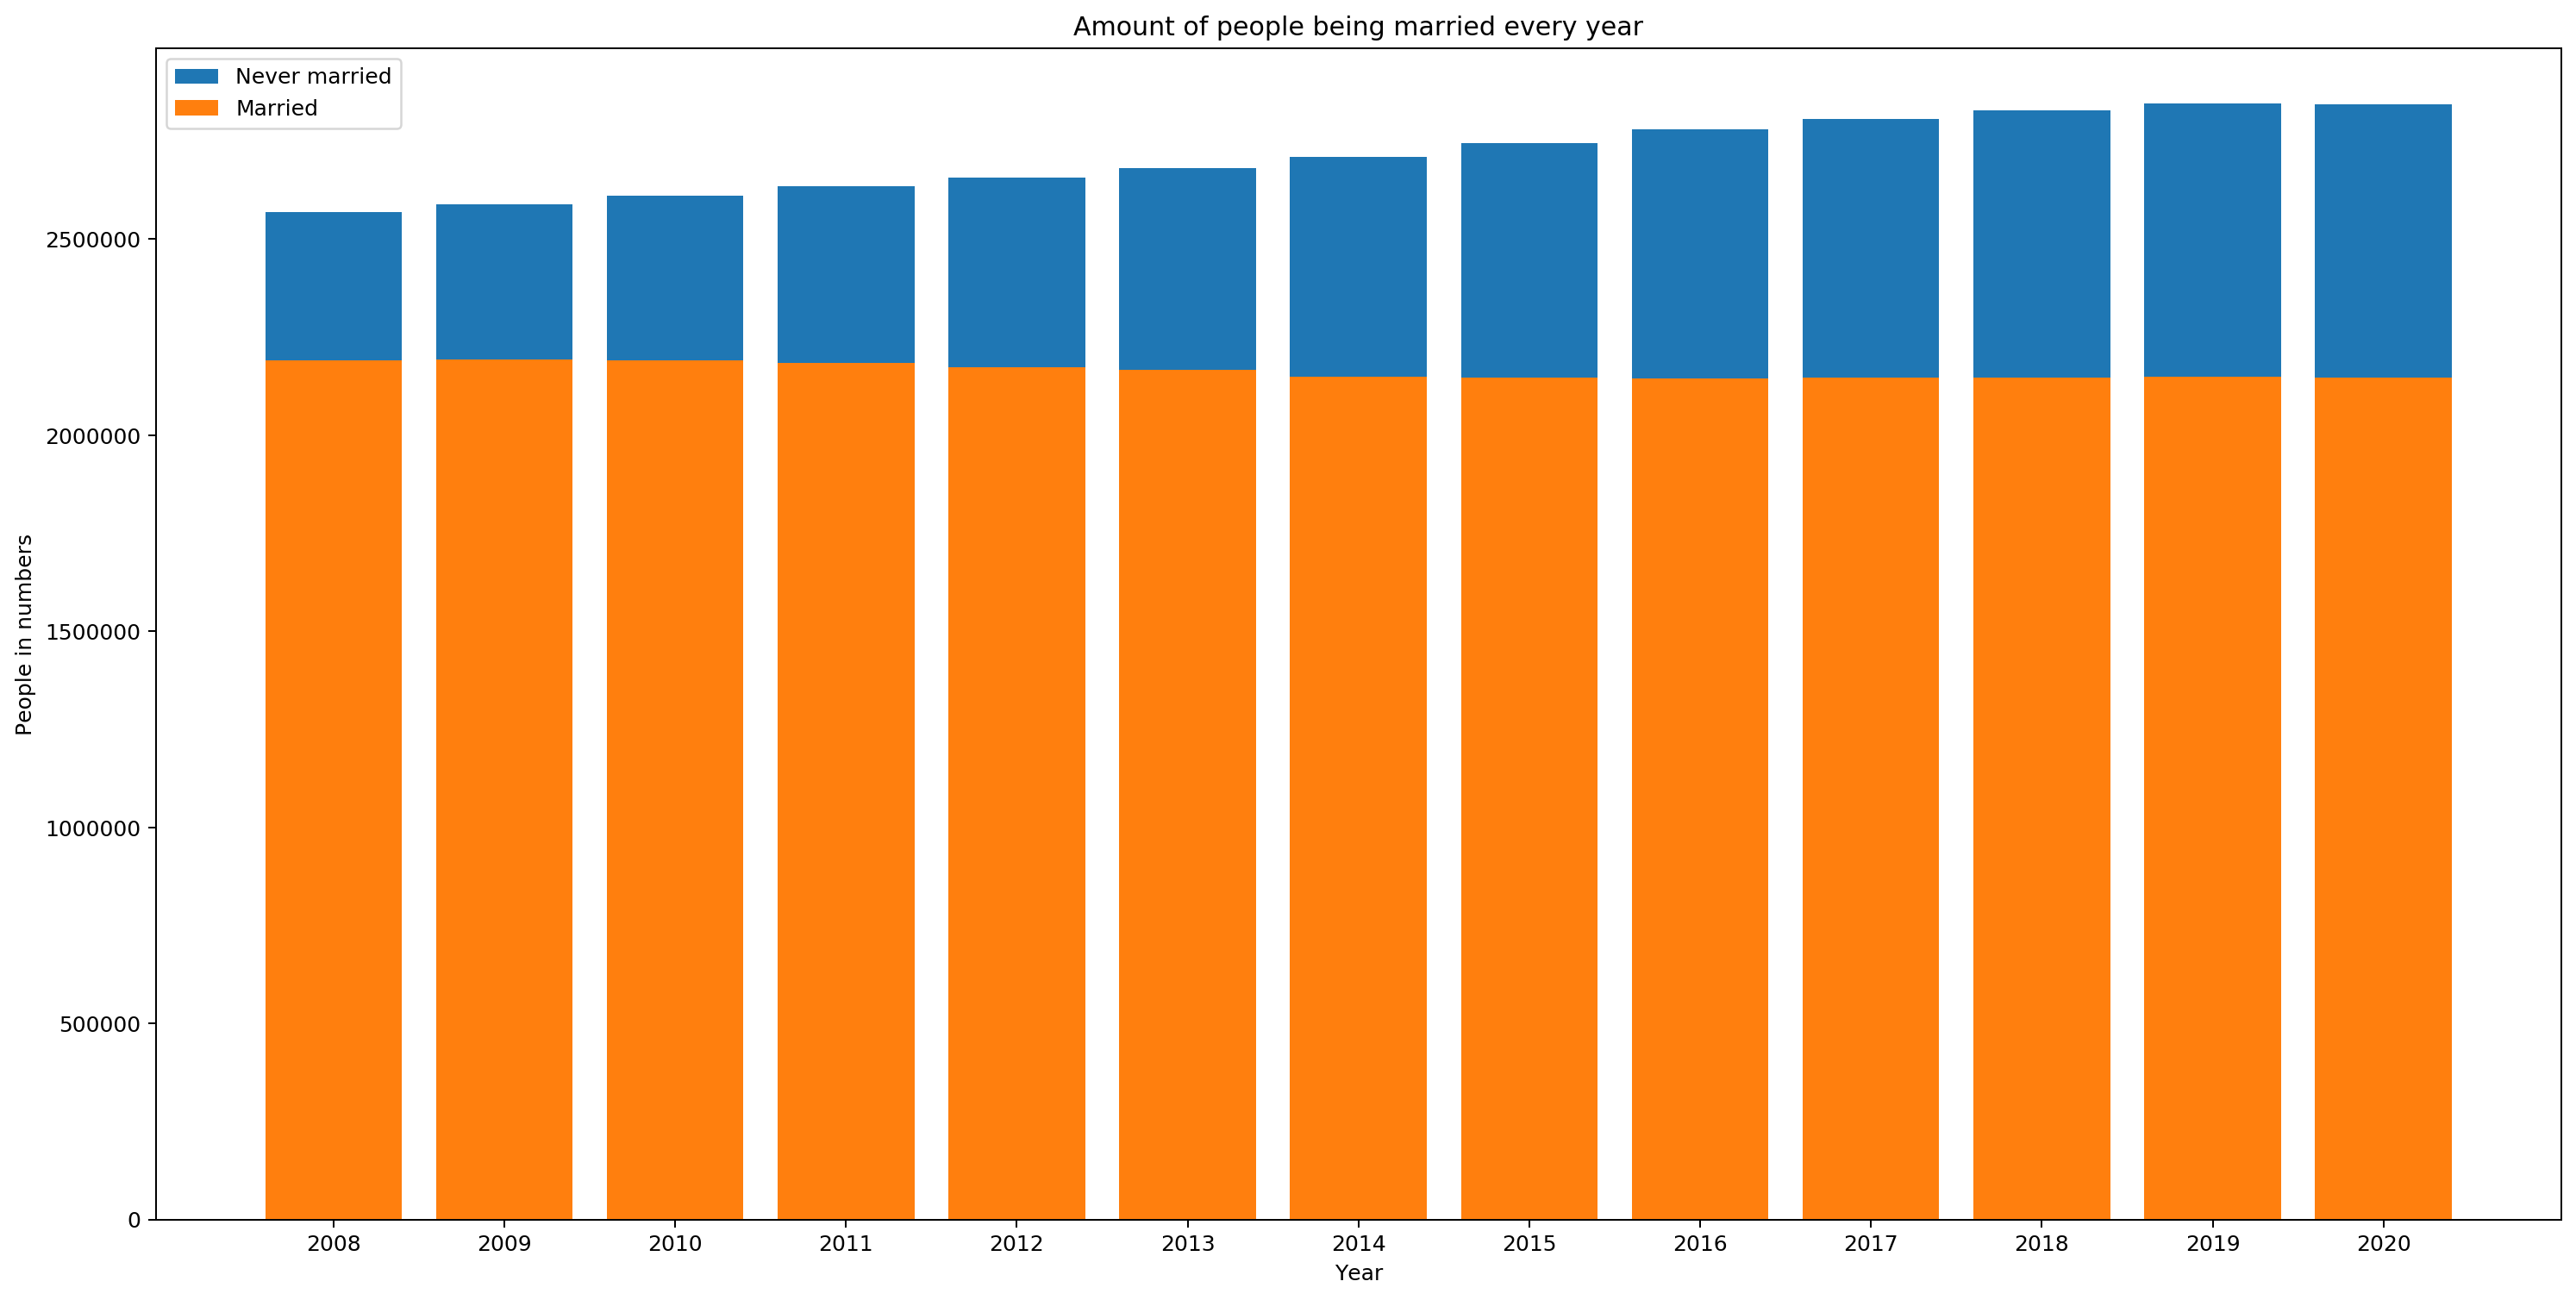

In [31]:
url = 'https://api.statbank.dk/v1/data/FOLK1A/CSV?CIVILSTAND=G%2CU&OMR%C3%85DE=000&Tid=2008K4%2C2009K4%2C2010K4%2C2011K4%2C2012K4%2C2013K4%2C2014K4%2C2015K4%2C2016K4%2C2017K4%2C2018K4%2C2019K4%2C2020K1'
pandas_CSV = pandas.read_csv(url, delimiter=';')
pandas_CSV['TID'] = pandas_CSV['TID'].map(lambda x: int(x[:-2]))
data = numpy.array(pandas_CSV)

#Creating dictionaries to handle panda data 

cities_married_amount = {}
cities_never_married_amount = {}

#Sorting by city

for city in data:
    if city[0] == 'Gift/separeret':
        cities_married_amount[city[2]] = city[3]
    else:
        cities_never_married_amount[city[2]] = city[3]

plot.figure(num=None, figsize=(20, 10), dpi=180, facecolor='w', edgecolor='k')

y_bar_married = cities_married_amount.values()
y_bar_unmarried = cities_never_married_amount.values()
x_bar = cities_married_amount.keys()

plot.bar(x_bar, y_bar_unmarried, label="Never married")
plot.bar(x_bar, y_bar_married, label="Married")

plot.xticks(list(x_bar))

plot.ylabel('People in numbers')
plot.xlabel('Year')
plot.title('Amount of people being married every year')
plot.legend()
